# Ball Recognizer
The goal of this project is to classify 20 different types of sports balls / game balls commonly played around the world. The types are following: <br/>
1. Soccer Ball
2. Cricket Ball
3. Basketball Ball
4. Field Hockey Ball
5. Volleyball 
6. Tennis Ball
7. Rugby Ball
8. Baseball
9. Table Tennis Ball (Ping Pong)
10. American Football 
11. Golf Ball
12. Handball
13. Pool Ball
14. Water Polo Ball
15. Softball
16. Bocce Ball
17. Bowling Ball
18. Squash Ball
19. Lacrosse Ball
20. Wiffleball

# Setting Up Necessary Things

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Work Station/Ball Recognizer

/content/drive/My Drive/Work Station/Ball Recognizer


# Download Images from Browser

You can download images from Google Image Search and Bing Image Search. You can try it out in your own time. You might need to build a scraper or use their API. <br/>

For ease, we are going to use **DuckDuckGo Image Search**. <br/>

**Good news!** Fastai has a function to do this for us.

In [ ]:
doc(search_images_ddg)

In [ ]:
ball_labels = ['american football ball',
               'baseball ball',
               'basketball ball',
               'bocce ball',
               'bowling ball',
               'cricket ball',
               'field hockey ball',
               'golf ball',
               'handball ball',
               'lacrosse ball',
               'pool ball',
               'rugby ball',
               'soccer ball',
               'softball ball',
               'squash ball',
               'table tennis ball',
               'tennis ball',
               'volleyball ball',
               'water polo ball',
               'wiffleball ball']

len(ball_labels)

20

In [ ]:
images = search_images_ddg(ball_labels[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://www.teamsterlingathletics.com/wp-content/uploads/2015/10/Custom-Mini-Soccer-Ball-Example-4.png'

In [ ]:
doc(download_url)

In [ ]:
dest = "Soccer Ball.jpg"
download_url(images[0], dest, show_progress=False)

Path('Soccer Ball.jpg')

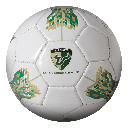

In [ ]:
image = Image.open(dest)
image.to_thumb(128, 128)

## Combine all of them

In [ ]:
data_path = "data"
if not os.path.exists(data_path): 
  os.mkdir(data_path)

for ball_type in ball_labels:

  dest = f"{data_path}/{ball_type}"
  if not os.path.exists(dest): 
    os.mkdir(dest)

  try:
    ball_image_urls = search_images_ddg(ball_type)
    download_images(dest, urls = ball_image_urls)
    
  except:
    continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#7448) [Path('data/soccer ball/d059cc1a-a49d-4d57-b7ae-096d73aa5f13.jpg'),Path('data/soccer ball/a0ae2e5c-1937-44dc-9324-b28f25b4d4e9.jpg'),Path('data/soccer ball/e638c9c6-9f67-40dc-bafd-05cddd1f211a.jpg'),Path('data/soccer ball/612651fb-1b3c-4734-8937-3f147568fe34.jpg'),Path('data/soccer ball/7da5527d-9403-4c7b-84ab-4963f81fc8ad.jpeg'),Path('data/soccer ball/37d208d8-0f5f-4d4a-99f2-815ed411c31e.jpg'),Path('data/soccer ball/9ab90815-e7c7-4a1c-b4ef-6dbdf2538f12.jpg'),Path('data/soccer ball/8a97da33-360d-4be0-8049-15fc3cf478e9.jpg'),Path('data/soccer ball/61547ac8-b479-4aa0-a41e-31423fdb3262.jpg'),Path('data/soccer ball/db93a65a-2278-4caa-9694-0a7beec52171.jpg')...]

In [ ]:
failed = verify_images(image_counts)
failed

(#68) [Path('data/soccer ball/d461c62a-d6d8-43df-97d1-6c133a670779.png'),Path('data/soccer ball/b6e30bf7-39e4-40f6-8187-c9bbfd551aab.png'),Path('data/cricket ball/5f0b9d66-5695-4bfe-96fe-e7534901e092.jpg'),Path('data/cricket ball/9ba3fa9c-28f8-4780-8596-ae14fe1d4859.jpg'),Path('data/cricket ball/97c75caf-99a1-48e7-8bf3-ab39b8d7d635.jpg'),Path('data/cricket ball/fb827b7c-9c27-4d6a-afd0-9bf2431f7228.jpg'),Path('data/cricket ball/133750a4-ea8d-4e63-bc7f-44631496efe4.jpg'),Path('data/cricket ball/ab65667d-d2c3-4bf0-a1ea-dacb9298cf67.jpg'),Path('data/cricket ball/31c5e8a3-d65c-4515-baab-14f32e43e01a.jpg'),Path('data/cricket ball/dabcaf23-2b64-49fa-8ad8-66a047b79d0e.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#68) [None,None,None,None,None,None,None,None,None,None...]

# From Data to Data Loaders

In [ ]:
doc(get_image_files)

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

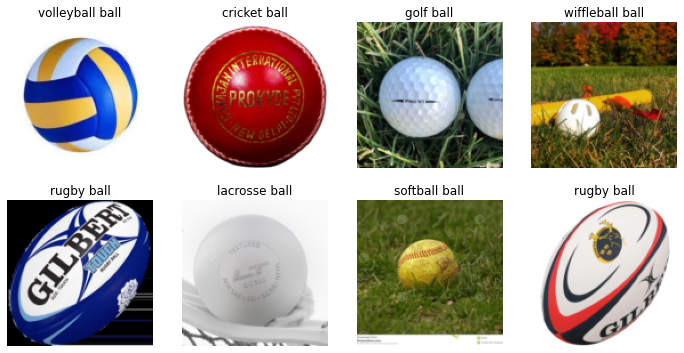

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

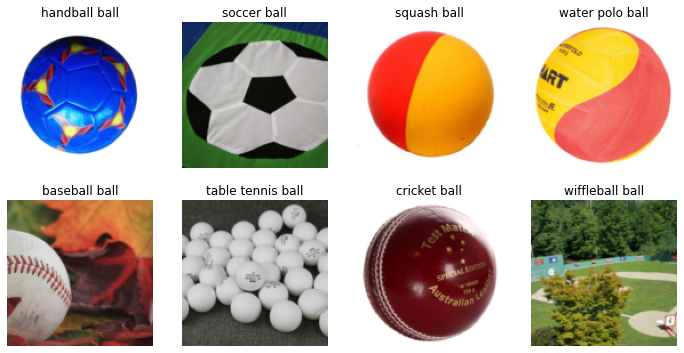

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation

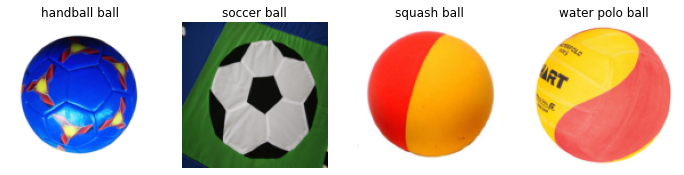

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

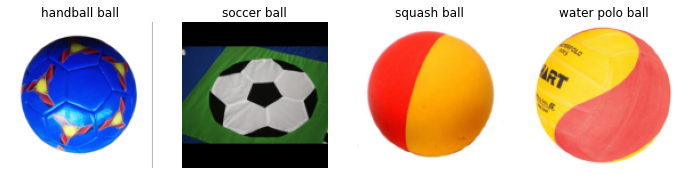

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

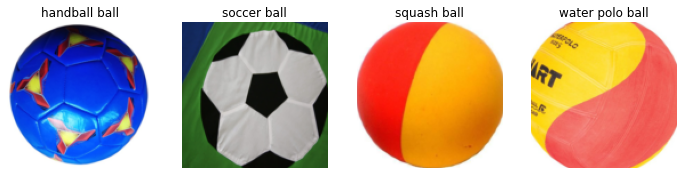

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
doc(aug_transforms)

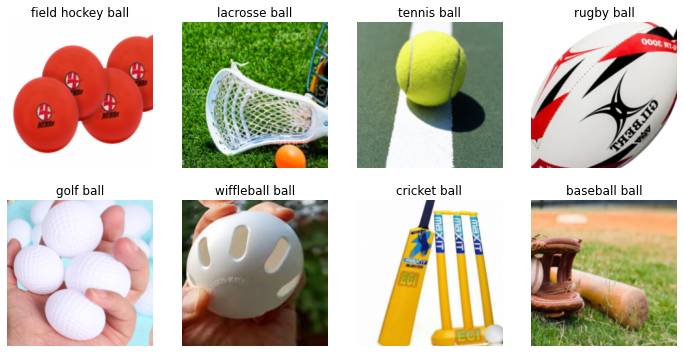

In [ ]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "ball_dataloader_v0.pkl")